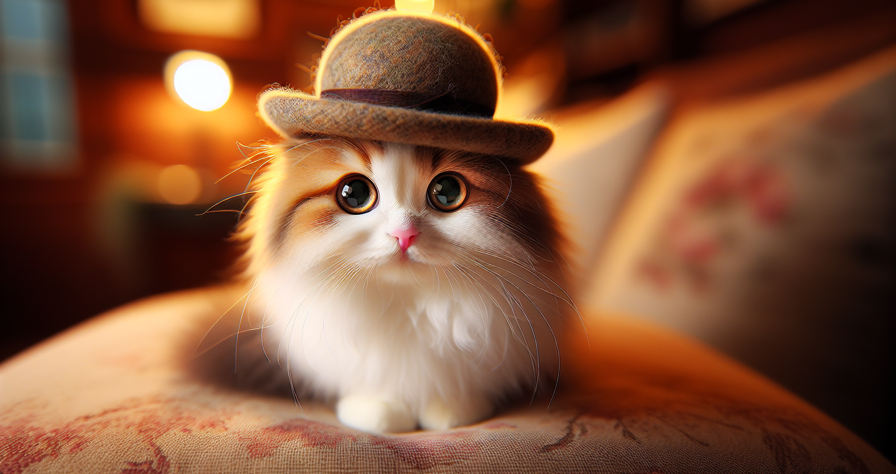

In [3]:
from openai import OpenAI
import requests
from io import BytesIO
from PIL import Image
import os 
from dotenv import load_dotenv

load_dotenv()

class ImageGenerator:
    def __init__(
            self, 
            api_key:str=os.environ.get("OPENAI_API_KEY"),
            model:str="dall-e-3",
        ):
        self.api_key = api_key
        self.client = OpenAI()
        self.model = model

    def crop_height(self, img, pixels):
        width, height = img.size
        half_pixels = pixels // 2
        # crop from top
        img = img.crop((0, half_pixels, width, height))
        # crop from bottom
        img = img.crop((0, 0, width, height - half_pixels))
        return img
    
    def scale_image(self, img, percent:float=0.1):
        width, height = img.size
        new_width = int(width * percent)
        new_height = int(height * percent)
        img = img.resize((new_width, new_height))
        return img

    def generate(
            self, 
            prompt:str, 
            size:str="1792x1024", 
            quality:str="standard", 
            n:int=1
        ):
        response = self.client.images.generate(
            prompt=prompt,
            size=size,
            quality=quality,
            model=self.model,
            n=n,
        )
        url = response.data[0].url
        img = requests.get(url)
        img = Image.open(BytesIO(img.content))
        # img = self.crop_height(img, 150)
        img = self.scale_image(img, 0.5)
        return img
    
generator = ImageGenerator()
prompt = "A cute cat with a hat"
img = generator.generate(prompt)
img